<a href="https://colab.research.google.com/github/AsangIngle/Car-Counter/blob/main/Cat_dog_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
 path="/content/drive/MyDrive/jupyterNotebook/DeepLearning/dogs-vs-cats"

In [8]:
import cv2
from pathlib import Path

In [9]:
import os
from pathlib import Path

In [10]:
test_path="/content/drive/MyDrive/jupyterNotebook/DeepLearning/dogs-vs-cats/test"
train_path="/content/drive/MyDrive/jupyterNotebook/DeepLearning/dogs-vs-cats/train"

In [11]:
import os
os.chdir(test_path)#used to set the directory
print(os.getcwd())#used to get the current directory


/content/drive/MyDrive/jupyterNotebook/DeepLearning/dogs-vs-cats/test


In [12]:
#how to list all the sub-directories
list1=os.listdir()
print(list1)

['cats', 'dogs']


In [13]:
test_path_with_cats=os.path.join(test_path,'cats')
os.chdir(test_path_with_cats)

In [14]:
print(os.getcwd())

/content/drive/MyDrive/jupyterNotebook/DeepLearning/dogs-vs-cats/test/cats


In [15]:
cat_img_list=os.listdir()

In [16]:
import matplotlib.pyplot as plt

print(cat_img_list)

['cat.7889.jpg', 'cat.8519.jpg', 'cat.8030.jpg', 'cat.8505.jpg', 'cat.5572.jpg', 'cat.6375.jpg', 'cat.8048.jpg', 'cat.8564.jpg', 'cat.7221.jpg', 'cat.8049.jpg', 'cat.5648.jpg', 'cat.6875.jpg', 'cat.614.jpg', 'cat.7775.jpg', 'cat.7682.jpg', 'cat.7835.jpg', 'cat.8477.jpg', 'cat.6248.jpg', 'cat.8209.jpg', 'cat.561.jpg', 'cat.6890.jpg', 'cat.6215.jpg', 'cat.5768.jpg', 'cat.7807.jpg', 'cat.621.jpg', 'cat.7083.jpg', 'cat.6816.jpg', 'cat.7204.jpg', 'cat.6155.jpg', 'cat.6295.jpg', 'cat.7045.jpg', 'cat.7145.jpg', 'cat.6076.jpg', 'cat.639.jpg', 'cat.7487.jpg', 'cat.6828.jpg', 'cat.8310.jpg', 'cat.7372.jpg', 'cat.7177.jpg', 'cat.7264.jpg', 'cat.6588.jpg', 'cat.5626.jpg', 'cat.6963.jpg', 'cat.5614.jpg', 'cat.6996.jpg', 'cat.6539.jpg', 'cat.6127.jpg', 'cat.8180.jpg', 'cat.7925.jpg', 'cat.7798.jpg', 'cat.8162.jpg', 'cat.7987.jpg', 'cat.5921.jpg', 'cat.6500.jpg', 'cat.7909.jpg', 'cat.7096.jpg', 'cat.6792.jpg', 'cat.6953.jpg', 'cat.848.jpg', 'cat.6507.jpg', 'cat.8436.jpg', 'cat.5969.jpg', 'cat.6105.jp

In [17]:
final_path_cat=os.path.join(test_path_with_cats,cat_img_list[0])

img=cv2.imread(final_path_cat)
cat_list=[]
cat_list.append(img)

In [18]:
for i in range(len(cat_img_list)):
  final_path_cat=os.path.join(test_path_with_cats,cat_img_list[i])
  img=cv2.imread(final_path_cat)
  new_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  cat_list.append(new_img)


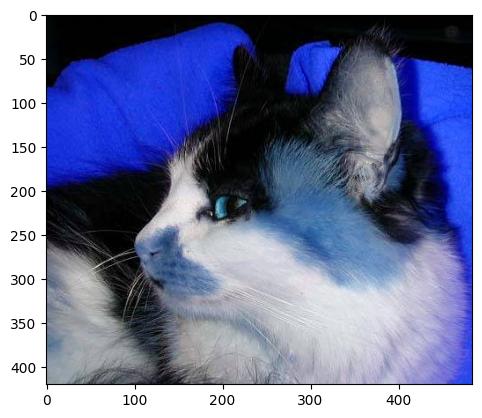

In [19]:
plt.imshow(cat_list[0])

In [20]:
test_path_with_dogs=os.path.join(test_path,'dogs')
os.chdir(test_path_with_dogs)

In [21]:
dogs_img_list=os.listdir()

In [22]:
final_path_dogs=os.path.join(test_path_with_dogs,dogs_img_list[0])

img=cv2.imread(final_path_dogs)
dogs_list=[]
dogs_list.append(img)

In [23]:
for i in range(len(cat_img_list)):
  final_path_dogs=os.path.join(test_path_with_dogs,dogs_img_list[i])
  img=cv2.imread(final_path_cat)
  new_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  dogs_list.append(new_img)


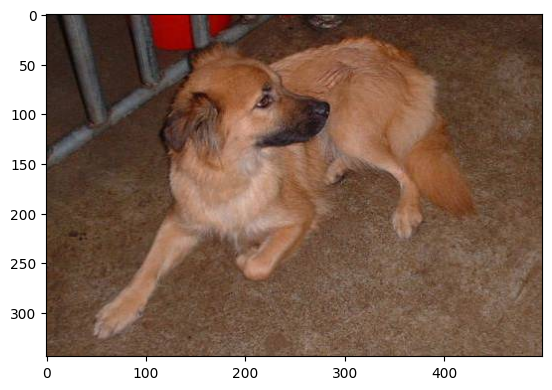

In [24]:
new_img=cv2.cvtColor(dogs_list[0],cv2.COLOR_BGR2RGB)
plt.imshow(new_img)

In [25]:
import numpy as np

X_train=dogs_list[0:int(np.floor(len(dogs_list)*0.8))]
#X_test=dogs_list[abs((len(dogs_list)*0.8))+1:len(dogs_list)]
print(len(X_train))

2000


In [26]:
#cats photos as dataset


import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Conv2D, Conv2DTranspose, MaxPooling2D,
    BatchNormalization, Activation, Concatenate, Resizing
)
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

def conv_block(input, num_filters):
    x = Conv2D(num_filters, (3, 3), padding='same')(input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(num_filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def encoder_block(input, num_filters):
    s = conv_block(input, num_filters)
    p = MaxPooling2D((2, 2))(s)
    return s, p

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input)

    # Resizing to match skip_features' shape
    target_height = int(skip_features.shape[1])
    target_width = int(skip_features.shape[2])
    x_resized = Resizing(target_height, target_width)(x)

    x = Concatenate()([x_resized, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)

    # Encoder
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    # Bridge
    b = conv_block(p4, 1024)

    # Decoder
    d1 = decoder_block(b, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    # Output
    outputs = Conv2D(3, (1, 1), activation='sigmoid')(d4)

    return Model(inputs, outputs)
desired_height, desired_width = 128, 128
def resize_and_normalize(images):
    resized_images = []
    for img in images:
        resized_img = cv2.resize(img, (desired_width, desired_height))
        resized_images.append(resized_img)
    return np.array(resized_images, dtype='float32') / 255.0  # Normalize pixel values

#cat_array = resize_and_normalize(cat_list)
dog_array = resize_and_normalize(dogs_list)
# Load and preprocess MNIST data
X_train = np.array(dog_array[0:int(np.floor(len(dog_array) * 0.8))])
X_test = np.array(dog_array[int(np.floor(len(dog_array) * 0.8)) + 1:])



#X_train = np.expand_dims(X_train, axis=-1)
#X_test = np.expand_dims(X_test, axis=-1)

# Add noise
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)




X_train_noisy.shape (128, 128, 3)
X_train.shape (128, 128, 3)


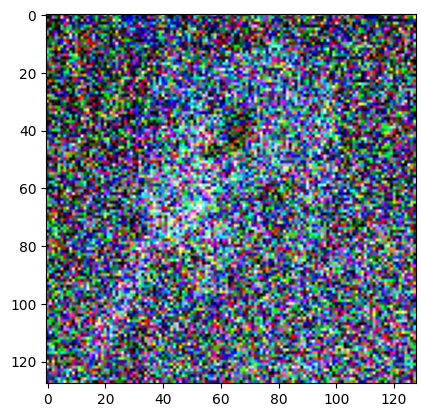

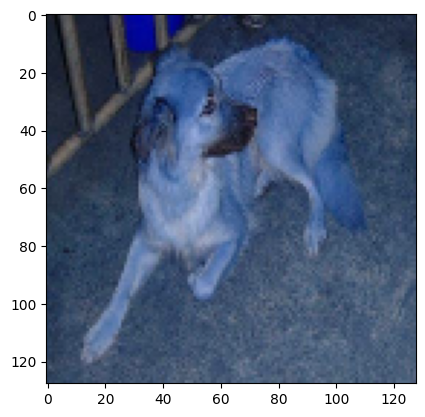

In [27]:
print("X_train_noisy.shape",X_train_noisy[4].shape)
print("X_train.shape",X_train[4].shape)
plt.imshow(X_train_noisy[0])
plt.show()
plt.imshow(X_train[0])
plt.show()

In [28]:
# Build and train the model
input_shape = (desired_height, desired_width, 3)  # Adjusting input_shape to (128, 128, 3)
model = build_unet(input_shape)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_noisy, X_train, epochs=10, batch_size=16)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 83s 246ms/step - accuracy: 0.4099 - loss: 0.6384
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 45s 251ms/step - accuracy: 0.7100 - loss: 0.6106
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 247ms/step - accuracy: 0.7818 - loss: 0.6071
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 249ms/step - accuracy: 0.8284 - loss: 0.6067
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 249ms/step - accuracy: 0.8552 - loss: 0.6066
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 248ms/step - accuracy: 0.8567 - loss: 0.6066
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 249ms/step - accuracy: 0.8861 - loss: 0.6065
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 249ms/step - accuracy: 0.8936 - loss: 0.6065
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 249ms/step - accuracy: 0.8953 - loss: 0.6065
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 248ms/step - accuracy: 0.9142 - loss: 0.6065


In [29]:
y_pred=model.predict(X_test_noisy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 906ms/step


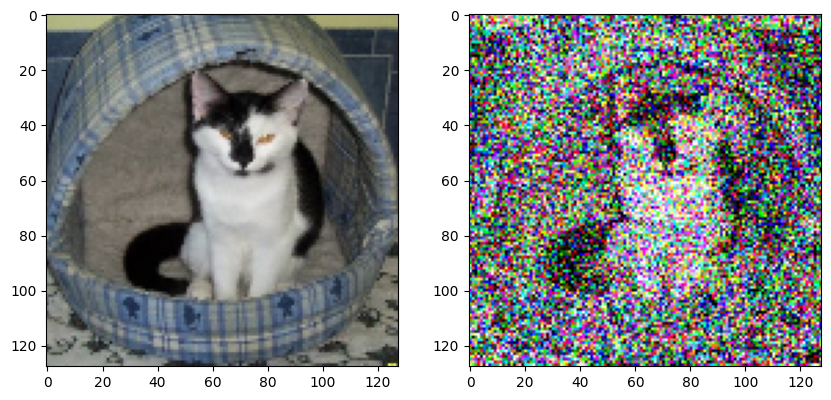

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.imshow(y_pred[0])
plt.subplot(1,2,2)

plt.imshow(X_test_noisy[0])